In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MiniBatchKMeans
from sklearn.metrics import silhouette_score

Нахождение игроков с одинаковым стилем игры сводится к задаче кластеризации. Перед тем как использовать алгоритмы кластеризации необходимо провести разведочный анализ данных на наличие отсутствующих значений и прочего.

# Предобработка данных

In [2]:
# загружаем таблицу из файла в датафрейм
data = pd.read_excel('Testovoe_data.xlsx', sheet_name=2)

In [3]:
data

,player,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,player1,0.000057,0.463585,NaN,0.269454,0.080972,NaN,0.480818,NaN,0.058824,...,0.433083,0.189568,0.393393,0.295057,0.251447,0.217143,NaN,0.287408,NaN,NaN
1,player2,0.000258,0.451477,NaN,0.280188,0.053763,NaN,0.449686,NaN,0.060870,...,0.419728,0.156165,0.403475,0.232939,0.149836,0.136318,NaN,0.242417,NaN,NaN
2,player3,0.000000,0.394161,NaN,0.259720,0.093137,NaN,0.498138,NaN,0.060150,...,0.424702,0.178597,0.374286,0.263825,0.258818,0.264657,NaN,0.264686,NaN,NaN
3,player4,0.000000,0.595941,NaN,0.285093,0.106122,NaN,0.409406,NaN,0.094595,...,0.405199,0.223855,0.410256,0.334586,0.270078,0.002787,NaN,0.250378,NaN,NaN
4,player5,0.000053,0.474469,NaN,0.237012,0.069284,NaN,0.464455,NaN,0.069588,...,0.447303,0.200082,0.364122,0.272970,0.307973,0.010024,NaN,0.284349,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,player543,0.000189,0.534304,NaN,0.303557,0.075136,NaN,0.627917,NaN,0.068460,...,0.395435,0.186000,0.436798,0.266040,0.243204,0.001825,NaN,0.235458,NaN,NaN
543,player544,0.000308,0.458941,NaN,0.219156,0.051532,NaN,0.449095,NaN,0.034483,...,0.427721,0.168777,0.506645,0.230414,0.209977,0.372106,NaN,0.278913,NaN,NaN
544,player545,0.000062,0.605558,NaN,0.286586,0.049505,NaN,0.417582,NaN,0.022222,...,0.358848,0.188563,0.465753,0.257146,0.257113,0.008716,NaN,0.221611,NaN,NaN
545,player546,0.000000,0.437931,NaN,0.251155,0.049327,NaN,0.672457,NaN,0.035714,...,0.414645,0.202812,0.293333,0.338469,0.232558,0.003523,NaN,0.224957,NaN,NaN


Всего в таблице 547 игроков, поэтому будем искать показатели где количество значений меньше 547.

In [4]:
# Перебираем все колонки кроме "player"
for i in range(1, data.shape[-1]):
    # если кол-во значений в колонке меньше 547 вывести её на экран
    if data.iloc[:, i].count() < len(data):
        print(f'{data.columns[i]}: {data.iloc[:, i].count()} values')

stat3: 0 values
stat6: 0 values
stat8: 0 values
stat9: 545 values
stat10: 0 values
stat18: 0 values
stat21: 0 values
stat26: 0 values
stat28: 0 values
stat29: 0 values
stat31: 0 values
stat34: 0 values
stat52: 0 values
stat53: 177 values
stat62: 4 values
stat67: 0 values
stat80: 546 values
stat83: 0 values
stat84: 0 values
stat85: 0 values
stat86: 0 values
stat91: 0 values
stat92: 5 values
stat101: 0 values
stat105: 0 values
stat106: 546 values
stat108: 0 values
stat112: 0 values
stat114: 0 values
stat116: 0 values
stat124: 0 values
stat126: 0 values
stat127: 0 values


Очень много абсолютно пустых колонок, мы просто их удалим

In [5]:
# создаем пустой список куда будут записываться названия колонок
columns_to_drop = []
# перебираем все колонки кроме "player"
for i in range(1, data.shape[-1]):
    # если в колнке нет значений добавить её в список
    if data.iloc[:, i].count() == 0:
        columns_to_drop.append(data.columns[i])
# удалить из фрейма колонки находящиеся в списке
data = data.drop(columns_to_drop, axis=1)

In [6]:
# Перебираем все колонки кроме "player"
for i in range(1, data.shape[-1]):
    # если кол-во значений в колонке меньше 547 вывести её на экран
    if data.iloc[:, i].count() < len(data):
        print(f'{data.columns[i]}: {data.iloc[:, i].count()} values')

stat9: 545 values
stat53: 177 values
stat62: 4 values
stat80: 546 values
stat92: 5 values
stat106: 546 values


С остальными колонками разберемся в ручную. 

In [8]:
# начнем с колонок "stat62" и "stat92" их мы просто удалим т.к. значений очень мало.
data = data.drop(['stat62', 'stat92'], axis=1)

In [9]:
# проверим тип данных для колонок "stat9", 'stat80' и "stat106"
print(data['stat9'].dtype)
print(data['stat80'].dtype)
print(data['stat106'].dtype)

float64
float64
float64


In [10]:
# это числовые колонки поэтому в пропущенные места вставим среднее значение
data['stat9'] = data['stat9'].fillna(data['stat9'].mean())
data['stat80'] = data['stat80'].fillna(data['stat80'].mean())
data['stat106'] = data['stat106'].fillna(data['stat106'].mean())

<AxesSubplot:>

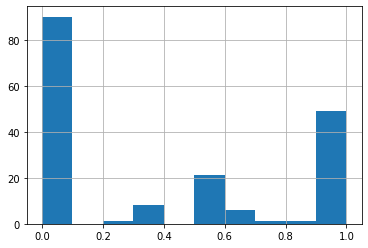

In [11]:
# для stat53 выведем распределение значений
data['stat53'].hist()

Вставлять в пустые места среднее значение в данном случае будет некорректно. Опираясь на определение показателей как "отношение числа произведенных игровых действий одного типа к числу возможностей данное действие произвести" делаем вывод что большая часть игроков это действие не совершают. Я вижу два варианта действий в данном случае: либо заполнить пропуски нулями либо вообще удалить эту колонку. Поскольку по данному показателю очень мало данных,а большая часть из присутствующих данных это нули я принимаю решение удалить эту колонку.

In [13]:
data = data.drop(['stat53'], axis=1)

In [14]:
# Перебираем все колонки кроме "player"
for i in range(1, data.shape[-1]):
    # если кол-во значений в колонке меньше 547 вывести её на экран
    if data.iloc[:, i].count() < len(data):
        print(f'{data.columns[i]}: {data.iloc[:, i].count()} values')

Разобрались с отсутствующими значениями, теперь проверим нет ли в данных дубликатов, а так же проверим тип данных для каждой колонки (из условия задачи мы знаем, что во всех колонках численные данные, но можно предположить случай, когда число записано как строка, например "0.5" вместо 0.5)

In [15]:
# в выходном массиве должно быть одно значение False иначе в таблице есть дубликаты
data.duplicated().unique()

array([False])

In [16]:
# перебираем все колонки кроме "player"
for i in range(1, data.shape[-1]):
    # если тип данных не float64 вывести параметр на экран
    if data[data.columns[i]].dtype != 'float64':
        print(f'{data.columns[i]} is {data[data.columns[i]].dtype}')

print('Done!')

Done!


Предобработка данных закончена (я сознательно не исследовал данные на выбросы). Приступаем к кластеризации, центральным алгоритмом кластеризации будет DBSCAN. У него есть одно полезное свойство во время кластеризации помимо метки кластера он может присвоить образцу метку "шум" (-1). В нашем случае это игроки, которые играют в своем собственном стиле и не могут быть отнесены ни к какому кластеру. Перед  использование алгоритма мы стандартизируем данные и понизим их размерность с помощью алгоритма принципиальных компонент (PCA).

Несмотря на то, что алгоритм DBSCAN сам умеет определять количество кластеров я хочу заранее попытаться оценить их количество. С помощью визуализации и коеффициента силуэта. 

# Трансформация данных

In [18]:
# стандартизируем показатели 
# приводим к нормальному распределению, где среднее равно нулю, а стандартное отклонение единице
features = data.iloc[:, 1:].values
features_std = StandardScaler().fit_transform(features)
# создаем экземпляр класса PCA, он понизит размерность данных так, чтобы сохранилосб 99% объясненой дисперсии
pca = PCA(n_components=0.99) 
features_pca = pca.fit_transform(features_std)
print("Оригинальное кол-во показателей:", data.shape[1])
print("Кол-во показателей после снижения размерности:", features_pca.shape[1])

Оригинальное кол-во показателей: 98
Кол-во показателей после снижения размерности: 50


Данные действия были предприняты по нескольким причинам:
1. Стандартизация данных ускоряет вычисления
2. Понижение размерности избавляет от проблемы мультиколлинеарности (корреляция между показателями)
3. Многие алгоритмы кластеризации (DBSCAN в том числе) основаны на вычислении расстояний между образцами,с ростом количества измерений (показателей) может возникнуть эффект "проклятие многомерности", который ухудшит качество работы алгоритмов.

# Определение кол-ва кластеров

Для начала попробуем визуально оценить кол-во кластеров, для этого воспользуемся тем же алгоритмом PCA, но в этот раз зададим ему оставить всего два самых "ценных" показателя и нарисуем точечную диаграмму.

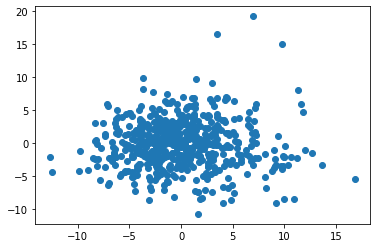

In [19]:
pca_visual = PCA(n_components=2)
# снижаем размерность с 98 до 2
visual_features = pca_visual.fit_transform(features_std)
# эти два показателя будут х и у для визуализации на координатной сетке
x = visual_features[:, 0]
y = visual_features[:, 1]
# нарисовать точечную диаграмму
plt.scatter(x, y)

Судить по диаграмме о кол-ве кластеров трудно, но она нам еще может пригодится для анализа работы алгоритма.

Теперь попробуем аналитически прикинуть кол-во кластеров для этого мы используем три аллгоритма кластеризации: KMeans, MiniBatchKMeans и AgglomerativeClustering, в которых мы сами должны задавать кол-во кластеров. Как это будет работать:
1. Зададим диапазон кол-ва кластеров от 2 до 12
2. Каждый алгоритм произведет кластеризацию 11 раз с разным кол-вом кластеров
3. После каждой кластеризации вычисляем коэффициент силуэта
4. Строим график зависимости коэффициента силуэта от кол-ва кластеров
5. Пик на графике будет указывать предположительное кол-во кластеров

Text(0.5, 1.0, 'Коэффициент силуэта для алгоритма KMeans')

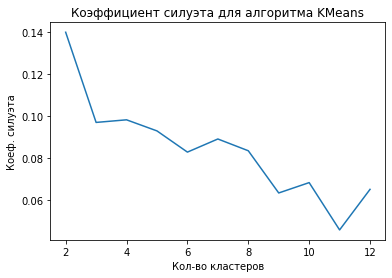

In [23]:
clusters = range(2, 13)
# создаем пустой лист куда будем заносить коеф. силуэта для разных количеств кластеров
silhouette = []
for i in clusters:
    # инициализируем алгоритм и применияем его к трансформированным данным
    kmean = KMeans(n_clusters=i)
    kmean.fit(features_pca)
    # вычисляем коеф.
    score = silhouette_score(features_pca, kmean.labels_)
    # добавляем его в список
    silhouette.append(score)
# создаем график
plt.plot(clusters, silhouette)
plt.xlabel('Кол-во кластеров')
plt.ylabel('Коеф. силуэта')
plt.title('Коэффициент силуэта для алгоритма KMeans')

Text(0.5, 1.0, 'Коэффициент силуэта для алгоритма MiniBatchKmeans')

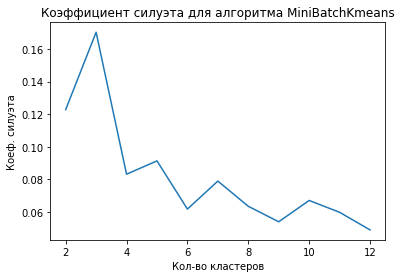

In [24]:
silhouette = []
for i in clusters:
    mini_kmean = MiniBatchKMeans(n_clusters=i)
    mini_kmean.fit(features_pca)
    score = silhouette_score(features_pca, mini_kmean.labels_)
    silhouette.append(score)
# создаем график
plt.plot(clusters, silhouette)
plt.xlabel('Кол-во кластеров')
plt.ylabel('Коеф. силуэта')
plt.title('Коэффициент силуэта для алгоритма MiniBatchKmeans')

Text(0.5, 1.0, 'Коэффициент силуэта для алгоритма AgglomerativeClustering')

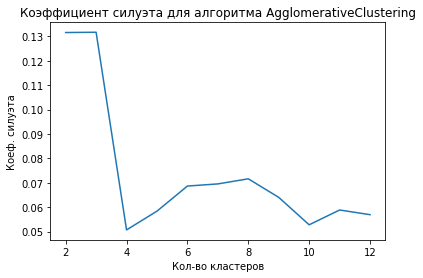

In [22]:
silhouette = []
for i in clusters:
    aggl = AgglomerativeClustering(n_clusters=i)
    aggl.fit(features_pca)
    score = silhouette_score(features_pca, aggl.labels_)
    silhouette.append(score)
# создаем график
plt.plot(clusters, silhouette)
plt.xlabel('Кол-во кластеров')
plt.ylabel('Коеф. силуэта')
plt.title('Коэффициент силуэта для алгоритма AgglomerativeClustering')

Из графиков следует, что оптимальное число кластеров не превышает 3. С учетом работы алгоритма DBSCAN я предполагаю два варианта развития событий: нахождение одного кластера и все что не вошло в него будет шумом, нахождение двух кластеров и все что не вошло в них будет шумом.

В алгоритме DBSCAN важную роль играет параметр eps. eps - это максимальное растояние между точками, при котором они считаются соседними. Чем меньше eps тем больше потенциальных кластеров будет найдено. Чтобы принять окончательное решение о гипперпараметрах DBSCAN сделаем следующее мы прогоним алгоритм DBSCAN при разных eps и будем отслеживать значение коэффициента силуэта и количество найденых кластеров.

Text(0, 0.5, 'Количество кластеров')

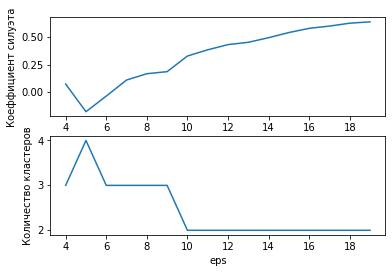

In [25]:
silhouette = []
number_of_clusters = []
distances = range(4, 20)
# перебираем потенциальные значения eps
for i in distances:
    dbscan = DBSCAN(eps=i,
                    n_jobs=-1 # этот параметр задействует все ядра процессора при вычислениях
                   )
    dbscan.fit(features_pca)
    score = silhouette_score(features_pca, dbscan.labels_)
    silhouette.append(score)
    # для подсчета найденных кластеров используем объект Counter 
    # он возвращает словарь типа (уникальные значения: кол-во этих значений в массиве)
    clusters = len(Counter(dbscan.labels_))
    number_of_clusters.append(clusters)
# построение графиков
plt.figure()
# график коеф.силуета
plt.subplot(211)
plt.plot(distances, silhouette)
plt.xlabel('eps')
plt.ylabel('Коеффициент силуэта')

plt.subplot(212)
plt.plot(distances, number_of_clusters)
plt.xlabel('eps')
plt.ylabel('Количество кластеров')

Теперь осталось принять последнее решение чему будет равно eps 9 или 10. Несмотря на рост коэффициента силуэта мы не можем утверждать что при больших значениях eps алгоритм работает лучше, потому что все что происходит после eps=10 это присваивание метки единственного кластера к образцам, которые до этого считались шумом. Я буду склонен к гипотезе о том, что в этом наборе данных два кластера и образцы относящиеся к "шуму"

# Распределение игроков

In [36]:
dbscan = DBSCAN(eps=9, n_jobs=-1)
dbscan.fit(features_pca)
# создадим новую таблицу с игроками и их принадлежностью к какому либо стилю
# если у игрока стоит -1 значит он не относится ни к одному кластеру
player_style = pd.DataFrame(data['player'])
player_style['groupNum'] = dbscan.labels_
player_style.to_excel('Answer_to_task2.xlsx', index=False)
player_style

,player,groupNum
0,player1,0
1,player2,-1
2,player3,0
3,player4,0
4,player5,0
...,...,...
542,player543,0
543,player544,-1
544,player545,0
545,player546,-1


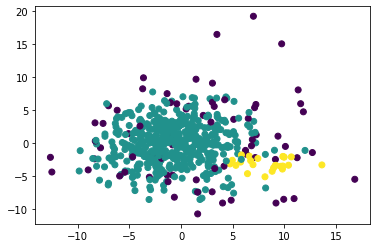

In [32]:
# визуализируем кластеризацию
pca_visual = PCA(n_components=2)
# снижаем размерность с 98 до 2
visual_features = pca_visual.fit_transform(features_std)
# эти два показателя будут х и у для визуализации на координатной сетке
x = visual_features[:, 0]
y = visual_features[:, 1]
# нарисовать точечную диаграмму
plt.scatter(x, y, c=dbscan.labels_)